In [3]:
!pip install rdkit pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 52.8 MB/s eta 0:00:00


In [4]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

smiles_list = [
    "CCO", "CCN", "CCOCC", "CCCC", "CCCN", "CCOCCO", "CCCO", "CCC=O",
    "CC(=O)O", "CC(=O)N", "CCOC", "CCOCCN", "CCCOC", "CCC(=O)O"
]
mols = [Chem.MolFromSmiles(s) for s in smiles_list]


In [5]:
data = []
for s, m in zip(smiles_list, mols):
    data.append({
        "SMILES": s,
        "MolWt": Descriptors.MolWt(m),
        "TPSA": Descriptors.TPSA(m),
        "LogP": Descriptors.MolLogP(m),
        "NumHDonors": Descriptors.NumHDonors(m),
        "NumHAcceptors": Descriptors.NumHAcceptors(m)
    })

df = pd.DataFrame(data)
df.head()


,SMILES,MolWt,TPSA,LogP,NumHDonors,NumHAcceptors
0,CCO,46.069,20.23,-0.0014,1,1
1,CCN,45.085,26.02,-0.0350,1,1
2,CCOCC,74.123,9.23,1.0428,0,1
3,CCCC,58.124,0.00,1.8064,0,0
4,CCCN,59.112,26.02,0.3551,1,1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = df[["MolWt", "TPSA", "NumHDonors", "NumHAcceptors"]]
y = df["LogP"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("R²:", round(r2_score(y_test, preds), 3))


R²: 0.163


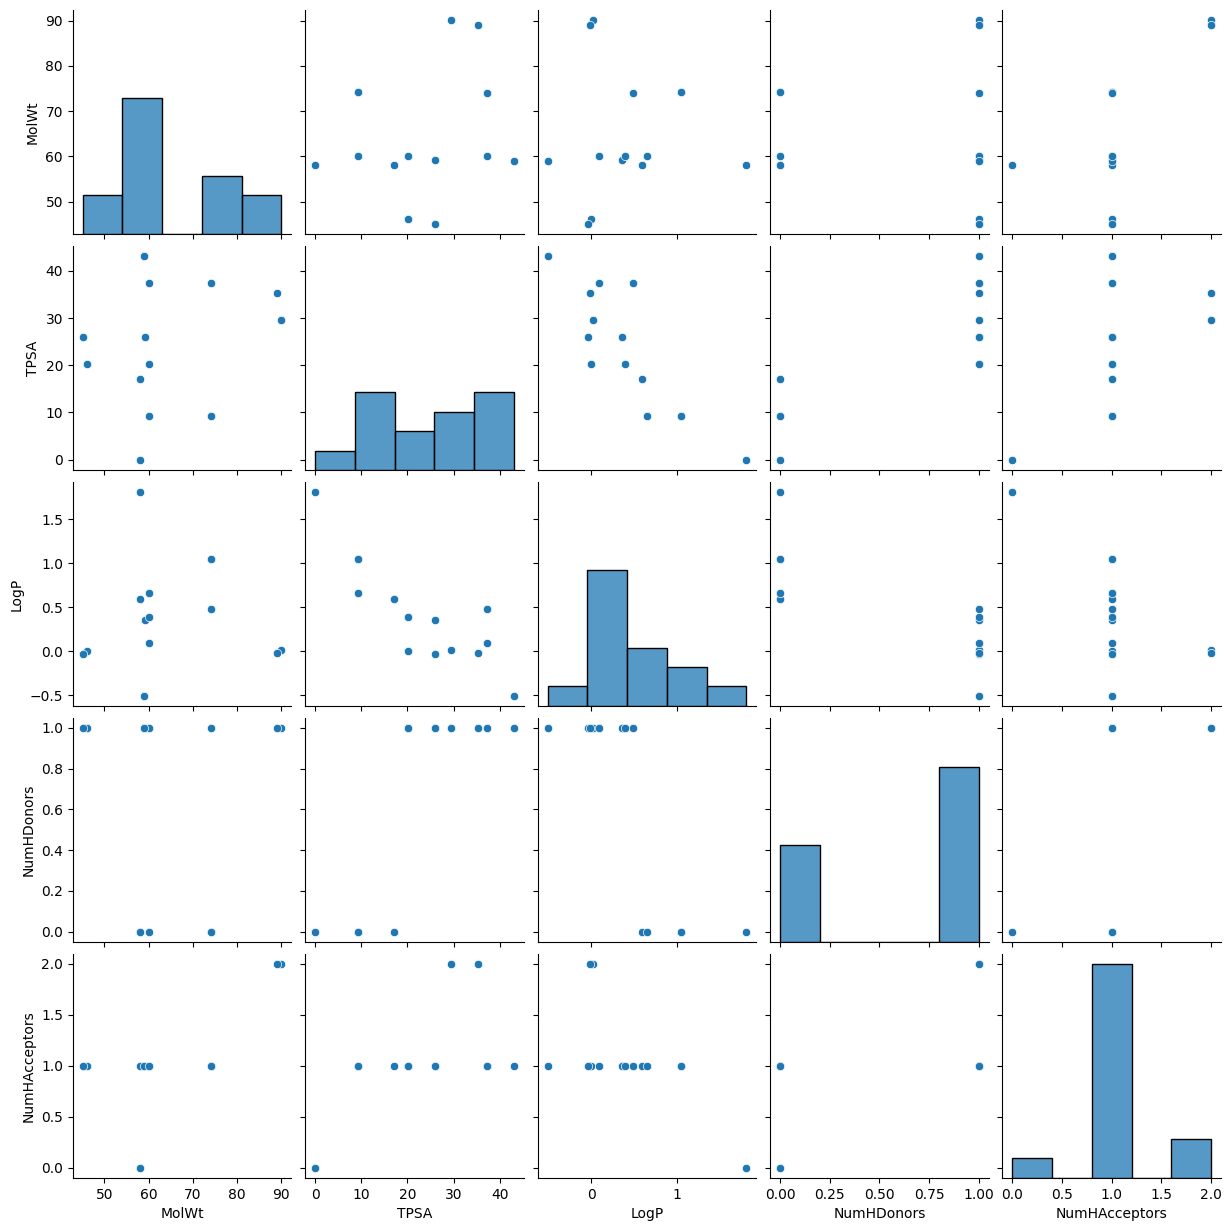

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()


### Summary

This notebook demonstrates a simple molecular AI workflow using RDKit and scikit-learn.
It generates molecular descriptors (MolWt, TPSA, LogP, H-bond counts) from SMILES strings and trains
a simple random forest model to predict LogP values. The workflow highlights descriptor generation,
basic property prediction, and exploratory visualization.

**R²:** 0.163 (baseline, 14 compounds)

This small experiment represents a hands-on step toward molecular data handling and evaluation,
bridging my prior work in generative modeling and scientific imaging with data-driven molecular discovery.
